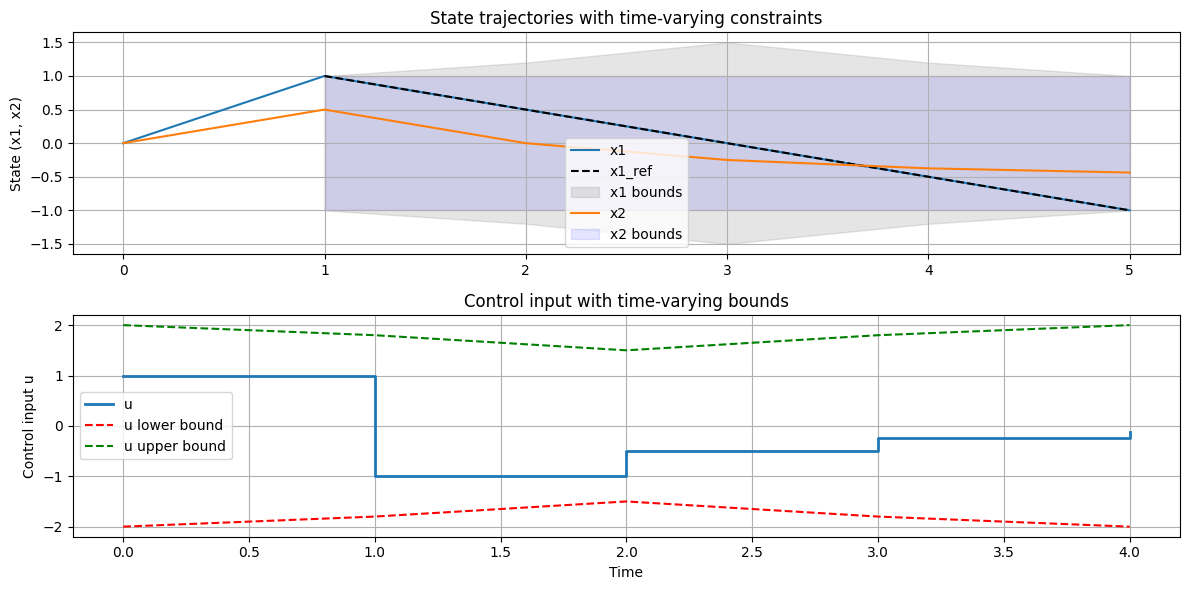

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# System matrices
A = np.array([[1.0, 1.0],
              [0.0, 1.0]])
B = np.array([[1.0],
              [0.5]])

n = A.shape[0]
m = B.shape[1]
N = 5  # Horizon

# Initial state
x0 = np.array([[0.0], [0.0]])

# Reference trajectory for x1
x1_ref = np.array([1.0, 0.5, 0.0, -0.5, -1.0])

# Time-varying constraints
x_lower = np.array([
    [-1.0, -1.2, -1.5, -1.2, -1.0],
    [-1.0, -1.0, -1.0, -1.0, -1.0]
])
x_upper = np.array([
    [ 1.0,  1.2,  1.5,  1.2,  1.0],
    [ 1.0,  1.0,  1.0,  1.0,  1.0]
])
u_lower = np.array([[-2.0, -1.8, -1.5, -1.8, -2.0]])
u_upper = np.array([[ 2.0,  1.8,  1.5,  1.8,  2.0]])

# Variables
x = cp.Variable((n, N+1))
u = cp.Variable((m, N))

# Objective
cost = cp.sum_squares(x[0, 1:] - x1_ref)

# Constraints
constraints = [x[:, 0] == x0.flatten()]
for t in range(N):
    constraints += [x[:, t+1] == A @ x[:, t] + B @ u[:, t]]
    constraints += [x_lower[:, t] <= x[:, t+1], x[:, t+1] <= x_upper[:, t]]
    constraints += [u_lower[:, t] <= u[:, t], u[:, t] <= u_upper[:, t]]

# Solve
prob = cp.Problem(cp.Minimize(cost), constraints)
prob.solve()

# 시간 index
t_x = np.arange(N+1)   # x는 N+1개
t_u = np.arange(N)     # u는 N개

# Plot
plt.figure(figsize=(12, 6))

# ----- x1 & x2 -----
plt.subplot(2, 1, 1)
plt.plot(t_x, x.value[0, :], label="x1")
plt.plot(t_x[1:], x1_ref, 'k--', label="x1_ref")
plt.fill_between(t_x[1:], x_lower[0], x_upper[0], color='gray', alpha=0.2, label="x1 bounds")
plt.plot(t_x, x.value[1, :], label="x2")
plt.fill_between(t_x[1:], x_lower[1], x_upper[1], color='blue', alpha=0.1, label="x2 bounds")
plt.ylabel("State (x1, x2)")
plt.title("State trajectories with time-varying constraints")
plt.grid(True)
plt.legend()

# ----- u -----
plt.subplot(2, 1, 2)
plt.step(t_u, u.value[0], where='post', label="u", linewidth=2)
plt.plot(t_u, u_lower[0], 'r--', label="u lower bound")
plt.plot(t_u, u_upper[0], 'g--', label="u upper bound")
plt.xlabel("Time")
plt.ylabel("Control input u")
plt.title("Control input with time-varying bounds")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
